In [62]:
import numpy as np
import json
from collections import defaultdict, Counter
from scipy import spatial, stats
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

In [5]:
ROOT = '/data0/lucy/manosphere/'
DATA = ROOT + 'data/'
GLOVE = DATA + 'glove/'
LOGS = ROOT + 'logs/'
AGG_EMBED_PATH = LOGS + 'semantics_mano/agg_embed/'

## Inspecting individual words

In [6]:
with open(LOGS + 'semantics_mano/results/scores.json', 'r') as infile: 
    scores = json.load(infile) 

vocab_order = []
with open(LOGS + 'semantics_mano/results/vocab_order.txt', 'r') as infile:
    vocab_order = infile.readlines()

with open(LOGS + 'coref_results/mano_gender_labels.json', 'r') as infile: 
    gender_labels = json.load(infile)

In [7]:
word_poles = defaultdict(Counter) # {word : {pole : score}}
for pole in scores: 
    s = scores[pole]
    for i, term in enumerate(vocab_order): 
        term = term.strip()
        word_poles[term][pole] = s[i]

In [38]:
print(word_poles['alpha'].most_common()[:10])
print(word_poles['alpha'].most_common()[-10:])

[('covered.a.01', 0.25558773434051607), ('clothed.a.01', 0.20460857317052156), ('affected.a.01', 0.19743399192574534), ('busy.a.01', 0.19340250274625598), ('heavy.a.01', 0.1636908153666239), ('mature.a.01', 0.16354657637493), ('androgynous.a.02', 0.15458037457221652), ('delicate.a.01', 0.15350429755099337), ('experienced.a.01', 0.14051773941321305), ('limited.a.01', 0.14049881094011013)]
[('thick.a.01', -0.15037315269704593), ('right.a.04', -0.1534961767732639), ('upland.a.01', -0.15577203865108905), ('capitalistic.a.01', -0.16656310684758813), ('reasonable.a.01', -0.17066723676667722), ('enthusiastic.a.01', -0.17872971894421674), ('optimistic.a.01', -0.182795450552113), ('fat.a.01', -0.2067701379119683), ('moral.a.01', -0.2303085749221428), ('assertive.a.01', -0.26428843033663973)]


In [9]:
print(word_poles['beta'].most_common()[:10])
print(word_poles['beta'].most_common()[-10:])

[('clothed.a.01', 0.2302962468802881), ('busy.a.01', 0.22930095475453216), ('covered.a.01', 0.219025675618927), ('heavy.a.01', 0.20749793146852147), ('experienced.a.01', 0.20338786825387173), ('affected.a.01', 0.18867313060161872), ('active.a.03', 0.17924688026636332), ('visible.a.01', 0.17472462286340498), ('heavy.a.04', 0.16004797618931815), ('stressed.a.02', 0.15305906321978352)]
[('harmless.a.01', -0.1537984253997058), ('auspicious.a.01', -0.15603754767041586), ('quiet.a.02', -0.15667051373894447), ('capitalistic.a.01', -0.15725929069852884), ('defiant.a.01', -0.16001385997621265), ('assertive.a.01', -0.16640615169659442), ('pleasing.a.01', -0.17419947414924292), ('reasonable.a.01', -0.19200510196082082), ('moral.a.01', -0.19343655301123647), ('optimistic.a.01', -0.20350268094208734)]


In [10]:
print(word_poles['escort'].most_common()[:10])
print(word_poles['escort'].most_common()[-10:])

[('visible.a.01', 0.22309017709915227), ('tough.a.01', 0.213360012645474), ('settled.a.02', 0.19296624720667427), ('used.a.01', 0.1857999460473453), ('inclined.a.02', 0.1457751942450308), ('genuine.a.01', 0.144264839289096), ('heavy.a.04', 0.13563279490208444), ('mature.a.01', 0.12739001348117515), ('mindful.a.01', 0.12420469830860567), ('definite.a.01', 0.12353489816582765)]
[('enchanted.a.01', -0.1297488955033736), ('smooth.a.01', -0.13000566120988905), ('serviceable.a.01', -0.1453235611522138), ('east.a.01', -0.15217072046089813), ('assertive.a.01', -0.1561224887165856), ('optimistic.a.01', -0.1587276536999621), ('foreign.a.02', -0.16007725646172424), ('blond.a.01', -0.16609265606499185), ('enthusiastic.a.01', -0.17101999786777775), ('vertical.a.01', -0.1960913578840736)]


In [11]:
print(word_poles['wife'].most_common()[:10])
print(word_poles['wife'].most_common()[-10:])

[('stressed.a.02', 0.1642349879986019), ('communicative.a.02', 0.1548538037300795), ('shod.a.01', 0.1543340554310427), ('inclined.a.02', 0.147667724371479), ('used.a.01', 0.11680373567631179), ('nascent.a.01', 0.11622444489836678), ('practical.a.01', 0.11315294289782041), ('clothed.a.01', 0.11043103649144768), ('androgynous.a.02', 0.1101759594250323), ('worthy.a.01', 0.10829729959320025)]
[('prejudiced.a.02', -0.11483809209471618), ('refined.a.01', -0.11657568793466172), ('rural.a.01', -0.12230937551930993), ('sincere.a.01', -0.1348905506471321), ('enthusiastic.a.01', -0.14627547671047186), ('pleasing.a.01', -0.1476187306605714), ('vertical.a.01', -0.1505769589603431), ('indulgent.a.01', -0.17271745348962464), ('womanly.a.01', -0.2510947708161832), ('blond.a.01', -0.26228053180066013)]


In [12]:
print(word_poles['celebrities'].most_common()[:10])
print(word_poles['celebrities'].most_common()[-10:])

[('tough.a.01', 0.17081688060138467), ('heavy.a.04', 0.16985555976159045), ('shod.a.01', 0.16921350151419515), ('formal.a.01', 0.16257934295405002), ('rational.a.01', 0.1539584724003656), ('clearheaded.a.01', 0.15095418273110356), ('practical.a.01', 0.14949227852479552), ('used.a.01', 0.13713366262867435), ('functional.a.01', 0.13655726047751593), ('live.a.01', 0.13282821636469758)]
[('publicized.a.01', -0.16861678299034474), ('indulgent.a.01', -0.1689884056297398), ('fashionable.a.01', -0.17495802324450085), ('assertive.a.01', -0.1790488263955755), ('blond.a.01', -0.18400036903294198), ('honorable.a.02', -0.19386016991548416), ('capitalistic.a.01', -0.20089025110473818), ('enchanted.a.01', -0.2038839316617339), ('optimistic.a.01', -0.219878418645344), ('enthusiastic.a.01', -0.2702015404193948)]


In [13]:
print(word_poles['princes'].most_common()[:10])
print(word_poles['princes'].most_common()[-10:])

[('tough.a.01', 0.1805231952555273), ('present.a.01', 0.16453077107531805), ('modern.a.01', 0.1598416223346724), ('tough.a.03', 0.1524890905554785), ('used.a.01', 0.1516182763602973), ('surface.a.01', 0.1467284602966408), ('androgynous.a.02', 0.14105737420570597), ('shod.a.01', 0.13003690030581358), ('empirical.a.01', 0.12563998245363733), ('settled.a.02', 0.11645714677201925)]
[('refined.a.01', -0.15650710977105559), ('moral.a.01', -0.1566110449753308), ('glorious.a.01', -0.15852079714472445), ('assertive.a.01', -0.17072084941067336), ('rhetorical.a.02', -0.1747360461794557), ('honorable.a.02', -0.17498177536861484), ('auspicious.a.01', -0.1800081524016834), ('gracious.a.01', -0.190434756294191), ('pleasing.a.01', -0.19060802410015823), ('noble.a.02', -0.43068912052829506)]


In [14]:
print(word_poles['normies'].most_common()[:10])
print(word_poles['normies'].most_common()[-10:])

[('fragrant.a.01', 0.23376121381115872), ('clean.a.01', 0.23125052308491592), ('superior.a.01', 0.22022119417854905), ('educated.a.01', 0.21966800373108855), ('mindful.a.01', 0.2182822500174266), ('busy.a.01', 0.21826220544904631), ('settled.a.02', 0.21495180240785697), ('modest.a.01', 0.21196934804280826), ('careful.a.01', 0.20642503539056628), ('humorous.a.01', 0.20533699336294906)]
[('nonproprietary.a.01', -0.12804204739587602), ('wet.a.01', -0.13109088872897956), ('proud.a.01', -0.14986895208471712), ('moral.a.01', -0.1507341828212458), ('simple.a.01', -0.15215763433495405), ('conscious.a.02', -0.15456060351936168), ('prejudiced.a.02', -0.1595962284843616), ('selfish.a.01', -0.2134563069472661), ('ordinary.a.01', -0.23051900162149913), ('fat.a.01', -0.23554981095825875)]


In [15]:
print(word_poles['simps'].most_common()[:10])
print(word_poles['simps'].most_common()[-10:])

[('clean.a.01', 0.2604844388082124), ('serious.a.01', 0.2527842823082931), ('definite.a.01', 0.24164403889662878), ('conventional.a.04', 0.23772145187427085), ('abstemious.a.01', 0.22977715695462214), ('careful.a.01', 0.216644847990057), ('gracious.a.01', 0.21475233326039692), ('cautious.a.01', 0.21308335759125957), ('tasteful.a.01', 0.2048277942128987), ('busy.a.01', 0.20080071600078564)]
[('cheerful.a.01', -0.13711930530631397), ('flexible.a.02', -0.13992376426055217), ('quiet.a.01', -0.14082034815067648), ('flexible.a.01', -0.1432322652076855), ('nonproprietary.a.01', -0.1515342433042608), ('changeable.a.02', -0.15319182252356459), ('indulgent.a.01', -0.16091865765036034), ('simple.a.01', -0.17922892126620177), ('proud.a.01', -0.216327865672561), ('fat.a.01', -0.281288708181036)]


In [16]:
print(word_poles['prostitute'].most_common()[:10])
print(word_poles['prostitute'].most_common()[-10:])

[('used.a.01', 0.2738366691962819), ('clothed.a.01', 0.23937097872188579), ('settled.a.02', 0.2291109180309099), ('genuine.a.01', 0.20774164855996033), ('reputable.a.01', 0.2034176074242275), ('free.a.01', 0.20046270103216252), ('safe.a.01', 0.19728634455816058), ('superior.a.01', 0.18511084056671884), ('visible.a.01', 0.18354977985627313), ('careful.a.01', 0.1824616231531639)]
[('assertive.a.01', -0.1599361735706449), ('capitalistic.a.01', -0.16414326236623333), ('tired.a.01', -0.17383875787119737), ('optimistic.a.01', -0.17687235032425183), ('commercial.a.01', -0.18044915161152808), ('corrupt.a.01', -0.18965010845156033), ('womanly.a.01', -0.19693576109523947), ('blond.a.01', -0.1993103340935537), ('indulgent.a.01', -0.21088796861255577), ('prejudiced.a.02', -0.26173099058036536)]


In [17]:
print(word_poles['sweet girl'].most_common()[:10])
print(word_poles['sweet girl'].most_common()[-10:])

[('soured.a.01', 0.2993762680324553), ('old.a.01', 0.24585196920696173), ('large.a.01', 0.23454624090201942), ('demanding.a.01', 0.20686306185232417), ('busy.a.01', 0.197643275722586), ('distant.a.02', 0.189853979436521), ('used.a.01', 0.18674327001249796), ('tough.a.03', 0.1843033060276611), ('much.a.01', 0.1842825865919937), ('cursed.a.01', 0.17506098967106104)]
[('reasonable.a.01', -0.20029725604609822), ('sympathetic.a.04', -0.20576029865844586), ('exculpatory.a.01', -0.2085969624311667), ('refined.a.01', -0.22853918654971514), ('beautiful.a.01', -0.23545727870178343), ('sincere.a.01', -0.2519843280077457), ('optimistic.a.01', -0.2563437773193954), ('pleasing.a.01', -0.2725066810670002), ('kind.a.01', -0.2763736927813124), ('lovable.a.01', -0.3158886668571521)]


In [39]:
print(word_poles['thot'].most_common()[:10])
print(word_poles['thot'].most_common()[-10:])

[('definite.a.01', 0.1942506848860781), ('clean.a.01', 0.1673035189706998), ('improved.a.01', 0.16144572589832623), ('motivated.a.01', 0.152628178859815), ('conventional.a.04', 0.14834912226141417), ('assisted.a.01', 0.14402170982564783), ('gracious.a.01', 0.14375817406252167), ('exempt.a.01', 0.1386175631587233), ('meaningful.a.01', 0.1376077435672449), ('stable.a.01', 0.13545902803716559)]
[('strange.a.01', -0.10258656068959875), ('flexible.a.02', -0.10486797902865443), ('satisfactory.a.01', -0.11070000339932176), ('thinkable.a.01', -0.11700241756682321), ('credulous.a.01', -0.12267252067925646), ('fat.a.01', -0.12638101965574716), ('nonproprietary.a.01', -0.12937259858528127), ('old.a.02', -0.13903732562136084), ('same.a.01', -0.15038574864936355), ('distant.a.01', -0.20976531914767527)]


In [41]:
print(word_poles['women'].most_common()[:10])
print(word_poles['women'].most_common()[-10:])

[('stressed.a.02', 0.2689686041765973), ('androgynous.a.02', 0.26615011162215274), ('used.a.01', 0.17418508989923898), ('shod.a.01', 0.17415410665801528), ('heavy.a.04', 0.15623034942651035), ('clothed.a.01', 0.14830480731774676), ('worthy.a.01', 0.14272245389365118), ('resolute.a.01', 0.13329823016528006), ('sacred.a.01', 0.13287332282955855), ('protected.a.01', 0.12342149919623766)]
[('selfish.a.01', -0.12718445486502283), ('capitalistic.a.01', -0.12951324600671643), ('hot.a.03', -0.1325397538418296), ('graceful.a.01', -0.1355055651284687), ('pleasing.a.01', -0.13815785044580048), ('indulgent.a.01', -0.17790987421169782), ('shapely.a.01', -0.18686821149604158), ('prejudiced.a.02', -0.2406379872123752), ('blond.a.01', -0.32147493747143213), ('womanly.a.01', -0.5140653893774207)]


# Variance within gender

In [18]:
fem_variance = Counter() # {pole: variance of fem terms}
fem_extremes = defaultdict(tuple) # {pole: (top N terms, bottom N terms)}
masc_variance = Counter() 
masc_extremes = defaultdict(tuple)
fem_scores = defaultdict(list) # {pole: scores in order of x_words}
masc_scores = defaultdict(list) # {pole: scores in order of y_words}
N = 10
for pole in scores: 
    s = scores[pole]
    x = [] # fem scores
    x_words = []
    y = [] # masc scores
    y_words = []
    for i, term in enumerate(vocab_order): 
        term = term.strip()
        if term in gender_labels: 
            if gender_labels[term] > 0.75: 
                x.append(s[i])
                x_words.append(term)
            elif gender_labels[term] < 0.25: 
                y.append(s[i])
                y_words.append(term)
    fem_variance[pole] = np.var(x)
    indices = np.argpartition(x, -N)[-N:]
    topN = [x_words[idx].strip() for idx in indices]
    indices = np.argpartition(x, N)[:N]
    bottomN = [x_words[idx].strip() for idx in indices]
    fem_extremes[pole] = (topN, bottomN, min(x), max(x))
    fem_scores[pole] = x
    
    masc_variance[pole] = np.var(y)
    indices = np.argpartition(y, -N)[-N:]
    topN = [y_words[idx].strip() for idx in indices]
    indices = np.argpartition(y, N)[:N]
    bottomN = [y_words[idx].strip() for idx in indices]
    masc_extremes[pole] = (topN, bottomN, min(y), max(y))
    masc_scores[pole] = y

In [19]:
for tup in fem_variance.most_common(20): 
    print(tup)
    pole = tup[0]
    topN, bottomN, mi, ma = fem_extremes[pole]
    print("TOP:", topN)
    print("BOTTOM:", bottomN)
    print(mi, ma)
    print()

('womanly.a.01', 0.0207367739111438)
TOP: ['debbie downer', 'creepy stalker', 'harlot', 'fuckbuddy', 'harlots', 'tomboys', 'downer', 'hambeast', 'hambeasts', 'tomboy']
BOTTOM: ['female', 'feminine woman', 'female gender', 'feminine women', 'female feminist', 'women', 'feminist women', 'masculine women', 'women women', 'females']
-0.5856429849438389 0.36751912466938597

('androgynous.a.02', 0.01048472108047411)
TOP: ['1 female', 'black females', 'female', 'white females', 'female gender', 'female one', 'two females', 'females', 'more females', 'female humans']
BOTTOM: ['nympho', 'noodlewhores', 'noodlewhore', 'supermodel', 'supermodels', 'manipulative bitch', 'stepmom', 'harlots', 'harlot', 'tomboy']
-0.19918680740902128 0.4108695695846027

('lovable.a.01', 0.010376138902053338)
TOP: ['female supremacist', 'degenerate whores', 'protester', 'stupid cunts', 'woman hater', 'accusers', 'woman haters', 'false accusers', 'women haters', 'cunts']
BOTTOM: ['cute one', 'cute friend', 'sweet girl

In [20]:
for tup in masc_variance.most_common(20): 
    print(tup)
    pole = tup[0]
    topN, bottomN, mi, ma = masc_extremes[pole]
    print("TOP:", topN)
    print("BOTTOM:", bottomN)
    print(mi, ma)
    print()

('androgynous.a.02', 0.012188110400550777)
TOP: ['male members', 'male character', 'dominant male', 'white males', 'male players', 'one male', 'dominant males', 'masculine male', 'male', 'males']
BOTTOM: ['fucking hypocrites', 'hypocrite', 'fucking hypocrite', 'tenmagnet', 'manipulator', 'hypocrites', 'chiropractor', 'manipulators', 'charlatan', 'endocrinologist']
-0.2604874475023576 0.44170802824635863

('womanly.a.01', 0.01105276724502953)
TOP: ['introvert', 'introverted guy', 'faggots', 'little faggot', 'nutter', 'faggot', 'buffoon', 'goober', 'wimp', 'wanker']
BOTTOM: ['male gender', 'feminist man', 'feminine men', 'feminist leaders', 'male feminist', 'feminist men', 'male feminists', 'masculine male', 'male nurses', 'masculine men']
-0.5029534793157493 0.29910455279596726

('reputable.a.01', 0.009900774126213017)
TOP: ['chump', 'snitch', 'serial rapist', 'schmuck', 'misogynist', 'misogynists', 'mugger', 'muggers', 'wimp', 'wimps']
BOTTOM: ['great leader', 'successful people', 'goo

## Axes similarities for each clusters' highly gendered terms

In [22]:
with open(LOGS + 'gram_counts/combined_catyear_word_count.json', 'r') as infile: 
    catyear_word_count = json.load(infile)
total_vocab_count = Counter() # {term : count in mano reddit + forum}
for catyear in catyear_word_count: 
    for term in catyear_word_count[catyear]: 
        total_vocab_count[term] += catyear_word_count[catyear][term]
print(total_vocab_count.most_common(20))

[('she', 1760546), ('women', 1314942), ('people', 1092284), ('he', 861007), ('man', 829419), ('guys', 819044), ('girl', 789403), ('girls', 735912), ('men', 719274), ('guy', 684915), ('woman', 630001), ('someone', 545557), ('friends', 406592), ('anyone', 373798), ('friend', 338119), ('person', 332783), ('female', 295285), ('everyone', 287904), ('male', 248241), ('others', 217140)]


In [23]:
with open(LOGS + 'time_series/cluster_members_6.json', 'r') as infile: 
    clust_words = json.load(infile)
clust_words_rev = {}
for clust in clust_words: 
    cluster_words = clust_words[clust]
    for w in cluster_words: 
        clust_words_rev[w] = clust

In [29]:
cluster_gender_sum = defaultdict(Counter) # {gender + clust_num : {pole : sum of word scores} }
cluster_gender_total = defaultdict(Counter) # {gender + clust_num : {pole : word count} }
pole_sum = defaultdict(Counter) # {gender : {pole : sum of word scores} }
pole_count = defaultdict(Counter) # {gender : {pole : word count} }
for pole in scores: 
    s = scores[pole]
    for i, term in enumerate(vocab_order): 
        term = term.strip()
        clust_num = clust_words_rev[term]
        if term in gender_labels: 
            if gender_labels[term] > 0.75: 
                cluster_gender_sum[str(clust_num) + '_fem'][pole] += s[i]*total_vocab_count[term]
                cluster_gender_total[str(clust_num) + '_fem'][pole] += total_vocab_count[term]
                pole_sum['fem'][pole] += s[i]*total_vocab_count[term]
                pole_count['fem'][pole] += total_vocab_count[term]
            elif gender_labels[term] < 0.25: 
                cluster_gender_sum[str(clust_num) + '_masc'][pole] += s[i]*total_vocab_count[term]
                cluster_gender_total[str(clust_num) + '_masc'][pole] += total_vocab_count[term]
                pole_sum['masc'][pole] += s[i]*total_vocab_count[term]
                pole_count['masc'][pole] += total_vocab_count[term]
            else: 
                cluster_gender_sum[str(clust_num) + '_other'][pole] += s[i]*total_vocab_count[term]
                cluster_gender_total[str(clust_num) + '_other'][pole] += total_vocab_count[term]
                pole_sum['other'][pole] += s[i]*total_vocab_count[term]
                pole_count['other'][pole] += total_vocab_count[term]

In [30]:
cluster_gender_avg = defaultdict(Counter) 
for key in cluster_gender_sum: 
    for pole in cluster_gender_sum[key]: 
        if key.endswith('fem'): 
            pole_avg = pole_sum['fem'][pole] / pole_count['fem'][pole]
        elif key.endswith('masc'): 
            pole_avg = pole_sum['masc'][pole] / pole_count['masc'][pole]
        else: 
            continue
        cluster_gender_avg[key][pole] = cluster_gender_sum[key][pole] / cluster_gender_total[key][pole] - pole_avg

In [144]:
cluster_order = [4, 3, 5, 1, 2, 0]
common_shift_poles = Counter()
for clust_num in cluster_order: 
    for gender in ['fem', 'masc']:
        key = str(clust_num) + '_' + gender
        print(key)
        top = cluster_gender_avg[key].most_common()[:10]
        bottom = cluster_gender_avg[key].most_common()[-10:]
        for tup in top: 
            common_shift_poles[(gender, tup[0])] += 1
        for tup in bottom: 
            common_shift_poles[(gender, tup[0])] += 1
        print(top)
        print(bottom)
        print()

4_fem
[('inclined.a.01', 0.04459573565821398), ('prejudiced.a.02', 0.03713141165917774), ('indulgent.a.01', 0.0354813595789933), ('mobile.a.02', 0.03459343243948438), ('selfish.a.01', 0.03234095407198535), ('trustful.a.01', 0.03137506990775096), ('integrated.a.03', 0.030301170980960808), ('fallible.a.01', 0.030145502237779814), ('physical.a.01', 0.029980500369450224), ('worldly.a.01', 0.027994427351348373)]
[('cautious.a.01', -0.032740800509103773), ('stable.a.01', -0.033518829629303956), ('employed.a.01', -0.03420936086981716), ('finished.a.01', -0.035076466999820956), ('androgynous.a.02', -0.03950542177227791), ('settled.a.02', -0.04030867319800274), ('skilled.a.01', -0.041152187275028104), ('concerned.a.01', -0.041624956854472595), ('articulate.a.01', -0.042553841328825164), ('educated.a.01', -0.04340031989911078)]

4_masc
[('common.a.01', 0.024186440105667808), ('bright.a.01', 0.022514191757610734), ('womanly.a.01', 0.01884714430527166), ('delicate.a.01', 0.01760280183098603), ('de

In [145]:
common_shift_poles.most_common(30)

[(('masc', 'delicate.a.01'), 4),
 (('fem', 'womanly.a.01'), 4),
 (('fem', 'beautiful.a.01'), 4),
 (('masc', 'androgynous.a.02'), 4),
 (('fem', 'prejudiced.a.02'), 3),
 (('fem', 'indulgent.a.01'), 3),
 (('fem', 'androgynous.a.02'), 3),
 (('masc', 'lawful.a.01'), 3),
 (('masc', 'sympathetic.a.04'), 3),
 (('masc', 'liked.a.01'), 3),
 (('masc', 'educated.a.01'), 3),
 (('fem', 'old.a.01'), 3),
 (('fem', 'conventional.a.04'), 3),
 (('fem', 'lively.a.01'), 3),
 (('fem', 'lovable.a.01'), 3),
 (('masc', 'heavy.a.04'), 3),
 (('masc', 'conventional.a.04'), 3),
 (('masc', 'beautiful.a.01'), 3),
 (('fem', 'selfish.a.01'), 2),
 (('fem', 'physical.a.01'), 2),
 (('fem', 'settled.a.02'), 2),
 (('fem', 'skilled.a.01'), 2),
 (('fem', 'articulate.a.01'), 2),
 (('fem', 'educated.a.01'), 2),
 (('masc', 'womanly.a.01'), 2),
 (('masc', 'decisive.a.03'), 2),
 (('masc', 'natural.a.02'), 2),
 (('masc', 'fortunate.a.01'), 2),
 (('masc', 'intellectual.a.02'), 2),
 (('masc', 'serious.a.01'), 2)]

## Pole-specific analysis

Grouping and focusing on six poles. We choose poles using a combination of social theory (what has prior qualitative research deemed significant?) and the poles that quantitatively demonstrate large shifts across temporal clusters, as well as variance across highly gendered portions of the vocab. 

**TODO**: need to separate out analysis based on whether axis is important for men or women

In [72]:
with open(LOGS + 'gram_counts/combined_catyear_word_count.json', 'r') as infile: 
    catyear_word_count = json.load(infile)
year_vocab_count = Counter() # {term_year : count in mano reddit + forum}
year_total = Counter() # {year: count}
for catyear in catyear_word_count: 
    year = catyear.split('_')[-1]
    for term in catyear_word_count[catyear]: 
        year_vocab_count[term + '_' + str(year)] += catyear_word_count[catyear][term]
        year_total[year] += catyear_word_count[catyear][term]
print(year_vocab_count.most_common(20))

[('women_2018', 369866), ('she_2018', 301291), ('she_2017', 240165), ('she_2019', 199792), ('people_2017', 197630), ('men_2017', 193478), ('women_2013', 193394), ('man_2018', 188619), ('guys_2018', 170581), ('he_2018', 162905), ('she_2012', 156226), ('man_2019', 154279), ('people_2019', 152824), ('women_2016', 138224), ('woman_2018', 134743), ('people_2018', 125745), ('people_2016', 119724), ('guy_2018', 119340), ('she_2016', 117969), ('people_2015', 117024)]


In [46]:
# to group together
attractive_poles = ['beautiful.a.01', 'lovable.a.01', 'attractive.a.01']
intelligence_poles = ['educated.a.01', 'intellectual.a.02']
age_poles = ['old.a.02', 'old.a.01']
# to analyze each separately
other_poles = ['prejudiced.a.02', 'heavy.a.04', 'clean.a.01'] 
poles_of_interest = intelligence_poles + attractive_poles + age_poles + other_poles

In [44]:
with open(LOGS + 'wikipedia/substitutes/bert-base-prob/word_rep_key.json', 'r') as infile: 
    word_rep_key = json.load(infile) # words that make up each pole

In [51]:
for key in word_rep_key: 
    parts = key.split('_')
    pole = parts[0]
    side = parts[1]
    adjs = set()
    if pole in poles_of_interest: 
        idx_list = word_rep_key[key]
        for item in idx_list: 
            adjs.add(item[1])
        print(key, adjs)
        print()

educated.a.01_right {'unlearned', 'untutored', 'unschooled', 'uneducated', 'undereducated', 'unstudied', 'unlettered', 'illiterate'}

educated.a.01_left {'semiliterate', 'well-read', 'learned', 'educated', 'lettered', 'well-educated', 'knowing', 'knowledgeable', 'self-educated', 'literate'}

clean.a.01_left {'clean', 'unstained', 'unused', 'spick', 'cleanly', 'pristine', 'unspotted', 'spic', 'scrubbed', 'immaculate', 'fresh', 'spotless', 'unsullied', 'washed'}

beautiful.a.01_left {'ravishing', 'sightly', 'stunning', 'pretty', 'beautiful', 'handsome', 'good-looking', 'resplendent', 'lovely', 'picturesque', 'bonnie', 'comely', 'gorgeous', 'fair', 'glorious', 'splendid', 'scenic', 'exquisite'}

old.a.01_right {'girlish', 'junior', 'four-year-old', 'tender', 'childlike', 'preteen', 'infantile', 'vernal', 'youthful', 'five-year-old', 'newborn', 'three-year-old', 'young', 'adolescent', 'teenaged', 'early', 'little', 'teenage', 'teen', 'immature', 'one-year-old', 'two-year-old', 'small', 'bo

In [116]:
df = pd.read_csv(LOGS + 'semantics_mano/results/specific_scores.csv', index_col=0)

In [117]:
df

,word,year,cosine similarity,axis
0,0 friends,2011,-0.131684,attractive.a.01
1,0 friends,2012,-0.094343,attractive.a.01
2,0 friends,2013,-0.120177,attractive.a.01
3,0 friends,2014,-0.121840,attractive.a.01
4,0 friends,2015,-0.125060,attractive.a.01
...,...,...,...,...
692925,zombies,2015,-0.218082,prejudiced.a.02
692926,zombies,2016,-0.211253,prejudiced.a.02
692927,zombies,2017,-0.157223,prejudiced.a.02
692928,zombies,2018,-0.091992,prejudiced.a.02


In [118]:
year_total

Counter({'2017': 4542508,
         '2015': 3357518,
         '2014': 2756047,
         '2016': 3119766,
         '2013': 2255214,
         '2019': 3893416,
         '2012': 1921556,
         '2018': 6703033,
         '2010': 1175103,
         '2011': 1424266,
         '2009': 958820,
         'None': 8354,
         '2008': 913910,
         '2007': 650128,
         '2006': 592316,
         '2005': 18364,
         '1970': 11})

In [120]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df['word_year'] = df['word'] + '_' + df['year'].map(str)
df['weight'] = df['word_year'].apply(lambda x: year_vocab_count[x])
df['year_total'] = df['year'].apply(lambda x: year_total[str(x)])
df["cosine_times_weight"] = df.cosine_similarity*df.weight
df

,word,year,cosine_similarity,axis,word_year,weight,year_total,cosine_times_weight
0,0 friends,2011,-0.131684,attractive.a.01,0 friends_2011,11,1424266,-1.448524
1,0 friends,2012,-0.094343,attractive.a.01,0 friends_2012,22,1921556,-2.075546
2,0 friends,2013,-0.120177,attractive.a.01,0 friends_2013,20,2255214,-2.403547
3,0 friends,2014,-0.121840,attractive.a.01,0 friends_2014,48,2756047,-5.848313
4,0 friends,2015,-0.125060,attractive.a.01,0 friends_2015,81,3357518,-10.129886
...,...,...,...,...,...,...,...,...
692925,zombies,2015,-0.218082,prejudiced.a.02,zombies_2015,411,3357518,-89.631817
692926,zombies,2016,-0.211253,prejudiced.a.02,zombies_2016,462,3119766,-97.598882
692927,zombies,2017,-0.157223,prejudiced.a.02,zombies_2017,561,4542508,-88.201953
692928,zombies,2018,-0.091992,prejudiced.a.02,zombies_2018,649,6703033,-59.702727


In [134]:
grouped_df = df[['year', 'axis', 'cosine_times_weight']].groupby(['year', 'axis'], as_index=False).sum()
grouped_df['year_total'] = grouped_df['year'].apply(lambda x: year_total[str(x)])
grouped_df['mean_cosine'] = grouped_df['cosine_times_weight'] / grouped_df['year_total']
grouped_df

,year,axis,cosine_times_weight,year_total,mean_cosine
0,2008,attractive.a.01,-47568.550915,913910,-0.052049
1,2008,beautiful.a.01,-24431.016733,913910,-0.026732
2,2008,clean.a.01,-4543.270630,913910,-0.004971
3,2008,educated.a.01,13792.095362,913910,0.015091
4,2008,heavy.a.04,87040.895356,913910,0.095240
...,...,...,...,...,...
115,2019,intellectual.a.02,-444330.155774,3893416,-0.114123
116,2019,lovable.a.01,-356161.778721,3893416,-0.091478
117,2019,old.a.01,-101273.481334,3893416,-0.026011
118,2019,old.a.02,311958.240635,3893416,0.080125


In [135]:
attractive_df = grouped_df[grouped_df['axis'].isin(attractive_poles)]
intelligence_df = grouped_df[grouped_df['axis'].isin(intelligence_poles)]
age_df = grouped_df[grouped_df['axis'].isin(age_poles)]
pole_title_map = {
    'prejudiced.a.02': 'discriminatory', 
    'heavy.a.04': 'distressful',
    'clean.a.01': 'clean',
}
other_df = []
for pole in other_poles: 
    this_df = grouped_df[grouped_df['axis'] == pole]
    other_df.append((this_df, pole))

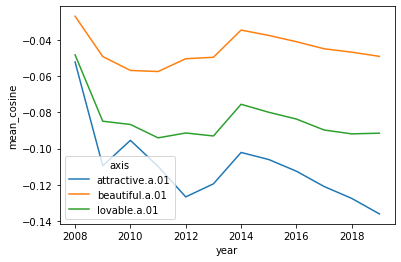

In [143]:
g = sns.lineplot(data=attractive_df, x="year", y="mean_cosine", hue='axis', ci=None)
plt.show()

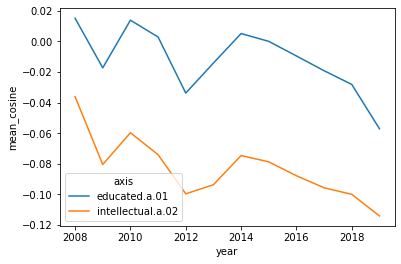

In [138]:
sns.lineplot(data=intelligence_df, x="year", y="mean_cosine", hue='axis', ci=None)
plt.show()

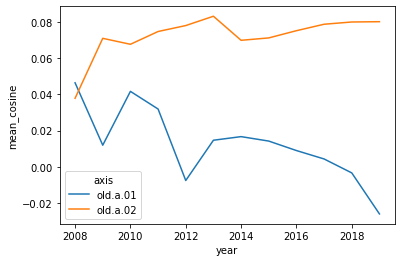

In [139]:
sns.lineplot(data=age_df, x="year", y="mean_cosine", hue='axis', ci=None)
plt.show()

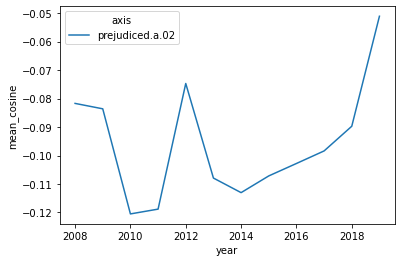

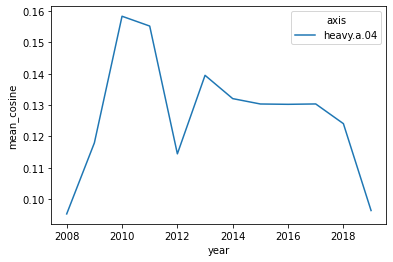

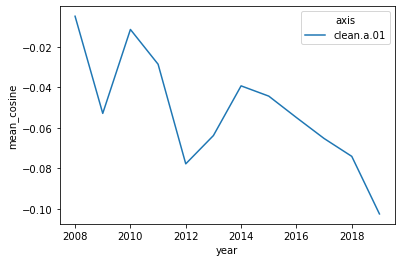

In [140]:
for tup in other_df: 
    this_df = tup[0]
    sns.lineplot(data=this_df, x="year", y="mean_cosine", hue='axis', ci=None)
    plt.show()